# **Workout Classification - Tensorflow**

In [ ]:
#@title Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Download Data

In [ ]:
# Upload first your data before execute these code below
path_workout = "/content/data_skripsi/pushupfix.csv"; # change this
path_other = "/content/data_skripsi/dance.csv"; # change this
name_class = "push up" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [ ]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [ ]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,326.094086,154.983476,331.091685,137.830750,317.976863,145.062339,342.960997,137.951728,310.280941,140.194280,...,300.121924,216.396782,348.713562,289.526610,297.571551,286.696751,353.071680,294.146898,303.332635,292.721121
1,327.589518,125.316767,333.177348,120.345973,322.716705,120.287254,340.543168,123.132391,314.991047,121.642411,...,309.952107,230.662085,346.563828,284.730007,309.915646,284.841997,336.456798,299.690554,316.592991,299.104436
2,328.732045,132.529974,333.057270,126.434684,324.526914,125.994427,337.848556,129.094675,317.038609,127.546678,...,308.624159,232.227994,343.740905,278.464571,305.671747,282.261337,341.374689,305.967743,308.958127,310.590296
3,334.576328,132.947873,338.824643,127.788359,329.162784,126.155398,338.652127,129.800003,316.497377,127.526391,...,306.946350,234.456306,345.584646,307.194843,298.740286,302.890401,342.509221,284.052347,301.454128,302.492254
4,334.403328,134.888022,338.736217,129.820806,329.025035,128.081099,338.542230,130.100961,316.330488,127.676382,...,306.671761,237.496017,346.112482,306.021538,298.616062,303.372777,342.746355,283.875049,302.836889,283.034990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26002,294.401525,260.213602,292.595015,259.173976,290.539706,258.720207,296.710159,240.715704,289.305746,241.837163,...,366.735927,240.099765,358.477241,305.786818,336.615974,294.231142,411.773700,276.209172,389.081834,268.915561
26003,295.703894,261.968173,294.588725,260.685599,291.907236,259.700511,300.375152,242.393413,292.055721,242.362913,...,366.301333,240.387072,358.883396,304.070112,334.692775,290.306023,410.649347,277.418570,390.083399,270.851298
26004,296.789564,261.431318,296.223702,258.941716,293.775281,258.139937,303.758721,241.689618,293.801062,241.690472,...,368.270762,242.465979,359.593283,303.676937,335.151788,289.622960,410.946685,278.928821,390.754555,273.419429
26005,299.294263,257.785605,300.175164,255.669227,296.740319,254.905707,305.889089,238.129296,298.439305,238.060338,...,370.246285,244.326635,360.375319,303.192948,335.942670,287.477978,411.143374,278.599989,392.180533,273.708943


In [ ]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,285.423521,118.696106,296.931298,107.450271,277.620952,112.022722,312.762457,101.063137,263.843182,102.281619,...,269.258930,192.833901,342.505188,225.863875,264.104471,218.966805,345.232966,255.732137,292.225127,242.555605
1,274.502717,46.653855,277.738255,42.862812,269.111851,43.306289,296.710474,29.511198,250.539507,36.460286,...,283.946620,122.173752,338.194428,173.601048,267.940098,158.695515,334.823457,251.993616,304.538417,246.991232
2,294.748268,66.817501,303.807395,51.827186,280.431260,51.601079,329.624989,51.390861,266.104774,49.938338,...,284.025786,165.582823,342.613998,248.553563,299.383363,247.459635,345.498414,305.455896,319.677769,308.384373
3,225.520697,199.456174,221.379983,188.187564,218.625622,193.372937,251.450022,169.737619,222.247693,171.836246,...,366.079301,161.956366,387.289339,160.640093,336.014188,147.984193,410.631467,174.564891,365.998675,165.817105
4,227.275255,200.807633,223.925845,193.119335,220.560449,194.369699,243.029111,170.566783,231.230959,173.507408,...,371.239109,165.072969,365.820360,189.059156,316.256986,173.733672,364.448191,178.624989,338.204119,176.047321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,441.690007,325.216735,451.749283,324.748468,451.951768,327.665714,438.416133,303.175625,440.294429,315.960998,...,216.205510,291.410536,341.885855,270.929752,258.522397,317.865852,244.188200,319.079436,220.545449,322.187005
3459,441.821579,323.648091,453.057630,321.262866,452.358246,326.598915,439.823980,301.758038,440.433759,315.335079,...,216.950703,291.441001,343.091874,270.361077,258.707810,317.199289,245.188647,318.501254,222.194233,323.091863
3460,418.687408,342.329056,436.929676,337.662644,438.213603,340.125404,444.616098,301.795184,448.858410,307.777851,...,153.726770,275.079463,280.930687,313.695846,263.868041,321.175824,162.415290,324.585885,146.967110,325.355254
3461,417.084477,339.889987,437.187064,333.040071,439.789192,335.108702,447.842784,291.841417,451.806723,292.068572,...,160.798068,264.921907,282.643417,317.689493,253.913307,324.613554,179.024646,323.544432,142.890083,324.253400


Data Preparation

In [ ]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,326.094086,154.983476,331.091685,137.830750,317.976863,145.062339,342.960997,137.951728,310.280941,140.194280,...,216.396782,348.713562,289.526610,297.571551,286.696751,353.071680,294.146898,303.332635,292.721121,push up
1,327.589518,125.316767,333.177348,120.345973,322.716705,120.287254,340.543168,123.132391,314.991047,121.642411,...,230.662085,346.563828,284.730007,309.915646,284.841997,336.456798,299.690554,316.592991,299.104436,push up
2,328.732045,132.529974,333.057270,126.434684,324.526914,125.994427,337.848556,129.094675,317.038609,127.546678,...,232.227994,343.740905,278.464571,305.671747,282.261337,341.374689,305.967743,308.958127,310.590296,push up
3,334.576328,132.947873,338.824643,127.788359,329.162784,126.155398,338.652127,129.800003,316.497377,127.526391,...,234.456306,345.584646,307.194843,298.740286,302.890401,342.509221,284.052347,301.454128,302.492254,push up
4,334.403328,134.888022,338.736217,129.820806,329.025035,128.081099,338.542230,130.100961,316.330488,127.676382,...,237.496017,346.112482,306.021538,298.616062,303.372777,342.746355,283.875049,302.836889,283.034990,push up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26002,294.401525,260.213602,292.595015,259.173976,290.539706,258.720207,296.710159,240.715704,289.305746,241.837163,...,240.099765,358.477241,305.786818,336.615974,294.231142,411.773700,276.209172,389.081834,268.915561,push up
26003,295.703894,261.968173,294.588725,260.685599,291.907236,259.700511,300.375152,242.393413,292.055721,242.362913,...,240.387072,358.883396,304.070112,334.692775,290.306023,410.649347,277.418570,390.083399,270.851298,push up
26004,296.789564,261.431318,296.223702,258.941716,293.775281,258.139937,303.758721,241.689618,293.801062,241.690472,...,242.465979,359.593283,303.676937,335.151788,289.622960,410.946685,278.928821,390.754555,273.419429,push up
26005,299.294263,257.785605,300.175164,255.669227,296.740319,254.905707,305.889089,238.129296,298.439305,238.060338,...,244.326635,360.375319,303.192948,335.942670,287.477978,411.143374,278.599989,392.180533,273.708943,push up


In [ ]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,285.423521,118.696106,296.931298,107.450271,277.620952,112.022722,312.762457,101.063137,263.843182,102.281619,...,192.833901,342.505188,225.863875,264.104471,218.966805,345.232966,255.732137,292.225127,242.555605,other
1,274.502717,46.653855,277.738255,42.862812,269.111851,43.306289,296.710474,29.511198,250.539507,36.460286,...,122.173752,338.194428,173.601048,267.940098,158.695515,334.823457,251.993616,304.538417,246.991232,other
2,294.748268,66.817501,303.807395,51.827186,280.431260,51.601079,329.624989,51.390861,266.104774,49.938338,...,165.582823,342.613998,248.553563,299.383363,247.459635,345.498414,305.455896,319.677769,308.384373,other
3,225.520697,199.456174,221.379983,188.187564,218.625622,193.372937,251.450022,169.737619,222.247693,171.836246,...,161.956366,387.289339,160.640093,336.014188,147.984193,410.631467,174.564891,365.998675,165.817105,other
4,227.275255,200.807633,223.925845,193.119335,220.560449,194.369699,243.029111,170.566783,231.230959,173.507408,...,165.072969,365.820360,189.059156,316.256986,173.733672,364.448191,178.624989,338.204119,176.047321,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,441.690007,325.216735,451.749283,324.748468,451.951768,327.665714,438.416133,303.175625,440.294429,315.960998,...,291.410536,341.885855,270.929752,258.522397,317.865852,244.188200,319.079436,220.545449,322.187005,other
3459,441.821579,323.648091,453.057630,321.262866,452.358246,326.598915,439.823980,301.758038,440.433759,315.335079,...,291.441001,343.091874,270.361077,258.707810,317.199289,245.188647,318.501254,222.194233,323.091863,other
3460,418.687408,342.329056,436.929676,337.662644,438.213603,340.125404,444.616098,301.795184,448.858410,307.777851,...,275.079463,280.930687,313.695846,263.868041,321.175824,162.415290,324.585885,146.967110,325.355254,other
3461,417.084477,339.889987,437.187064,333.040071,439.789192,335.108702,447.842784,291.841417,451.806723,292.068572,...,264.921907,282.643417,317.689493,253.913307,324.613554,179.024646,323.544432,142.890083,324.253400,other


In [ ]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,326.094086,154.983476,331.091685,137.830750,317.976863,145.062339,342.960997,137.951728,310.280941,140.194280,...,216.396782,348.713562,289.526610,297.571551,286.696751,353.071680,294.146898,303.332635,292.721121,push up
1,327.589518,125.316767,333.177348,120.345973,322.716705,120.287254,340.543168,123.132391,314.991047,121.642411,...,230.662085,346.563828,284.730007,309.915646,284.841997,336.456798,299.690554,316.592991,299.104436,push up
2,328.732045,132.529974,333.057270,126.434684,324.526914,125.994427,337.848556,129.094675,317.038609,127.546678,...,232.227994,343.740905,278.464571,305.671747,282.261337,341.374689,305.967743,308.958127,310.590296,push up
3,334.576328,132.947873,338.824643,127.788359,329.162784,126.155398,338.652127,129.800003,316.497377,127.526391,...,234.456306,345.584646,307.194843,298.740286,302.890401,342.509221,284.052347,301.454128,302.492254,push up
4,334.403328,134.888022,338.736217,129.820806,329.025035,128.081099,338.542230,130.100961,316.330488,127.676382,...,237.496017,346.112482,306.021538,298.616062,303.372777,342.746355,283.875049,302.836889,283.034990,push up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,441.690007,325.216735,451.749283,324.748468,451.951768,327.665714,438.416133,303.175625,440.294429,315.960998,...,291.410536,341.885855,270.929752,258.522397,317.865852,244.188200,319.079436,220.545449,322.187005,other
29466,441.821579,323.648091,453.057630,321.262866,452.358246,326.598915,439.823980,301.758038,440.433759,315.335079,...,291.441001,343.091874,270.361077,258.707810,317.199289,245.188647,318.501254,222.194233,323.091863,other
29467,418.687408,342.329056,436.929676,337.662644,438.213603,340.125404,444.616098,301.795184,448.858410,307.777851,...,275.079463,280.930687,313.695846,263.868041,321.175824,162.415290,324.585885,146.967110,325.355254,other
29468,417.084477,339.889987,437.187064,333.040071,439.789192,335.108702,447.842784,291.841417,451.806723,292.068572,...,264.921907,282.643417,317.689493,253.913307,324.613554,179.024646,323.544432,142.890083,324.253400,other


In [ ]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,326.094086,154.983476,331.091685,137.830750,317.976863,145.062339,342.960997,137.951728,310.280941,140.194280,...,300.121924,216.396782,348.713562,289.526610,297.571551,286.696751,353.071680,294.146898,303.332635,292.721121
1,327.589518,125.316767,333.177348,120.345973,322.716705,120.287254,340.543168,123.132391,314.991047,121.642411,...,309.952107,230.662085,346.563828,284.730007,309.915646,284.841997,336.456798,299.690554,316.592991,299.104436
2,328.732045,132.529974,333.057270,126.434684,324.526914,125.994427,337.848556,129.094675,317.038609,127.546678,...,308.624159,232.227994,343.740905,278.464571,305.671747,282.261337,341.374689,305.967743,308.958127,310.590296
3,334.576328,132.947873,338.824643,127.788359,329.162784,126.155398,338.652127,129.800003,316.497377,127.526391,...,306.946350,234.456306,345.584646,307.194843,298.740286,302.890401,342.509221,284.052347,301.454128,302.492254
4,334.403328,134.888022,338.736217,129.820806,329.025035,128.081099,338.542230,130.100961,316.330488,127.676382,...,306.671761,237.496017,346.112482,306.021538,298.616062,303.372777,342.746355,283.875049,302.836889,283.034990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,441.690007,325.216735,451.749283,324.748468,451.951768,327.665714,438.416133,303.175625,440.294429,315.960998,...,216.205510,291.410536,341.885855,270.929752,258.522397,317.865852,244.188200,319.079436,220.545449,322.187005
29466,441.821579,323.648091,453.057630,321.262866,452.358246,326.598915,439.823980,301.758038,440.433759,315.335079,...,216.950703,291.441001,343.091874,270.361077,258.707810,317.199289,245.188647,318.501254,222.194233,323.091863
29467,418.687408,342.329056,436.929676,337.662644,438.213603,340.125404,444.616098,301.795184,448.858410,307.777851,...,153.726770,275.079463,280.930687,313.695846,263.868041,321.175824,162.415290,324.585885,146.967110,325.355254
29468,417.084477,339.889987,437.187064,333.040071,439.789192,335.108702,447.842784,291.841417,451.806723,292.068572,...,160.798068,264.921907,282.643417,317.689493,253.913307,324.613554,179.024646,323.544432,142.890083,324.253400


In [ ]:
y

,class
0,push up
1,push up
2,push up
3,push up
4,push up
...,...
29465,other
29466,other
29467,other
29468,other


In [ ]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [ ]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.509522,0.430510,0.517331,0.382863,0.496839,0.402951,0.535877,0.383199,0.484814,0.389429,...,0.468941,0.601102,0.544865,0.804241,0.464956,0.796380,0.551675,0.817075,0.473957,0.813114
1,0.511859,0.348102,0.520590,0.334294,0.504245,0.334131,0.532099,0.342034,0.492174,0.337896,...,0.484300,0.640728,0.541506,0.790917,0.484243,0.791228,0.525714,0.832474,0.494677,0.830846
2,0.513644,0.368139,0.520402,0.351207,0.507073,0.349985,0.527888,0.358596,0.495373,0.354296,...,0.482225,0.645078,0.537095,0.773513,0.477612,0.784059,0.533398,0.849910,0.482747,0.862751
3,0.522776,0.369300,0.529414,0.354968,0.514317,0.350432,0.529144,0.360556,0.494527,0.354240,...,0.479604,0.651268,0.539976,0.853319,0.466782,0.841362,0.535171,0.789034,0.471022,0.840256
4,0.522505,0.374689,0.529275,0.360613,0.514102,0.355781,0.528972,0.361392,0.494266,0.354657,...,0.479175,0.659711,0.540801,0.850060,0.466588,0.842702,0.535541,0.788542,0.473183,0.786208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,0.690141,0.903380,0.705858,0.902079,0.706175,0.910183,0.685025,0.842155,0.687960,0.877669,...,0.337821,0.809474,0.534197,0.752583,0.403941,0.882961,0.381544,0.886332,0.344602,0.894964
29466,0.690346,0.899022,0.707903,0.892397,0.706810,0.907219,0.687225,0.838217,0.688178,0.875931,...,0.338985,0.809558,0.536081,0.751003,0.404231,0.881109,0.383107,0.884726,0.347178,0.897477
29467,0.654199,0.950914,0.682703,0.937952,0.684709,0.944793,0.694713,0.838320,0.701341,0.854938,...,0.240198,0.764110,0.438954,0.871377,0.412294,0.892155,0.253774,0.901627,0.229636,0.903765
29468,0.651694,0.944139,0.683105,0.925111,0.687171,0.930858,0.699754,0.810671,0.705948,0.811302,...,0.251247,0.735894,0.441630,0.882471,0.396740,0.901704,0.279726,0.898735,0.223266,0.900704


One Hot Encoding

In [ ]:
y = pd.get_dummies(y).values
y

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

In [ ]:
y = y.astype(np.uint8)  # Only change the data type if already in one-hot form
y


array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# First, split into 70% training and 30% temporary data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=123)



In [ ]:
# Then, split the temporary data into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [ ]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 20629
The number of test data X is: 4421
The number of train data y is : 20629
The number of test daya y is : 4421
The total dataset is : 29470


Modelling

In [ ]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
# Train the model with the updated parameters and callbacks
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),  # Reduced number of neurons
    tf.keras.layers.Dropout(0.4),  # Higher dropout to reduce overfitting
    tf.keras.layers.Dense(8, activation='relu'),   # Another simplified layer
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 714 (2.79 KB)

 Trainable params: 714 (2.79 KB)

 Non-trainable params: 0 (0.00 B)

Training

In [ ]:
# Compile the model with optimizer and loss function
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Set up callbacks for early stopping and learning rate adjustment
callback_es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitors validation loss
    patience=10,  # Stops if no improvement after 10 epochs
    restore_best_weights=True  # Ensures best weights are kept
)

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 5e-4 * 0.95 ** epoch)

In [ ]:

callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [ ]:
# Compile the model with optimizer and loss function
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model with regularization and callbacks
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    callbacks=[callback_es, lr_schedule],  # Early stopping and learning rate decay
    epochs=50
)

Epoch 1/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6386 - loss: 0.6434 - val_accuracy: 0.8876 - val_loss: 0.3174 - learning_rate: 5.0000e-04
Epoch 2/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8792 - loss: 0.3898 - val_accuracy: 0.8876 - val_loss: 0.2620 - learning_rate: 4.7500e-04
Epoch 3/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8848 - loss: 0.3378 - val_accuracy: 0.8876 - val_loss: 0.2386 - learning_rate: 4.5125e-04
Epoch 4/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8892 - loss: 0.3066 - val_accuracy: 0.8876 - val_loss: 0.2302 - learning_rate: 4.2869e-04
Epoch 5/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8893 - loss: 0.3000 - val_accuracy: 0.8876 - val_loss: 0.2225 - learning_rate: 4.0725e-04
Epoch 6/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8906 - loss: 0.2869 - val_accuracy: 0.8948 - val_loss: 0.2140 - learning_rate: 3.8689e-04
Epoch 7/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 

Visualization Acc & Loss

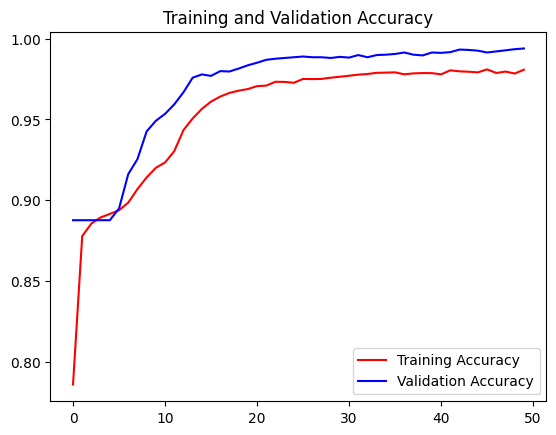

<Figure size 640x480 with 0 Axes>

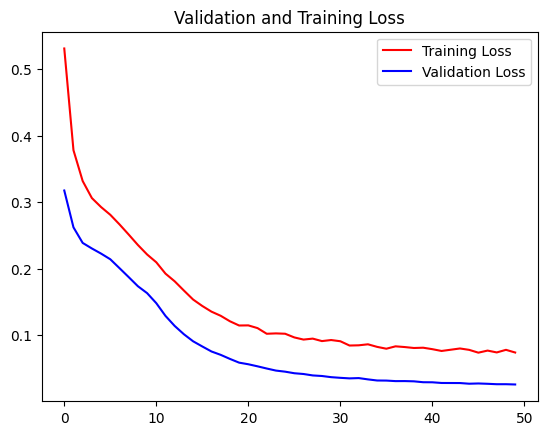

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Evaluation

In [ ]:
# After training your model, access the final values
accuracy = history.history['accuracy'][-1]  # Last training accuracy
loss = history.history['loss'][-1]  # Last training loss
val_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy
val_loss = history.history['val_loss'][-1]  # Last validation loss

# Print the formatted output
print(f"accuracy: {accuracy:.4f} - loss: {loss:.4f} - val_accuracy: {val_accuracy:.4f} - val_loss: {val_loss:.4f}")


accuracy: 0.9808 - loss: 0.0738 - val_accuracy: 0.9939 - val_loss: 0.0258


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.025770708918571472
Test accuracy: 0.9938927888870239


Test Prediction

In [ ]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
20481,0.299275,0.862571,0.299321,0.857903,0.296369,0.854809,0.318925,0.818168,0.308056,0.817962,...,0.47059,0.7513,0.587774,0.773887,0.549703,0.750065,0.679697,0.738626,0.626835,0.727206


In [ ]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : push up


In [ ]:
df_data['class'].unique()

array(['push up', 'other'], dtype=object)

In [ ]:
predict_sample = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [73]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
push up


In [74]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [75]:
# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 471   26]
 [   1 3923]]


In [76]:
# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       497
           1       0.99      1.00      1.00      3924

    accuracy                           0.99      4421
   macro avg       1.00      0.97      0.98      4421
weighted avg       0.99      0.99      0.99      4421



139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


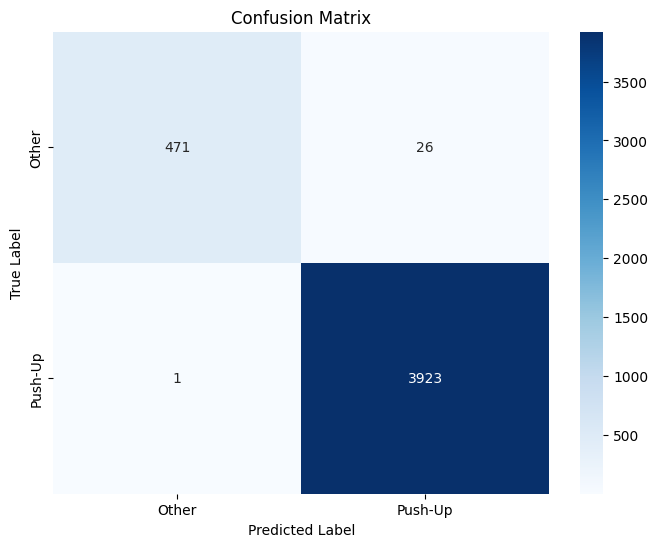

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Prediksi data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Other', 'Push-Up'], yticklabels=['Other', 'Push-Up'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

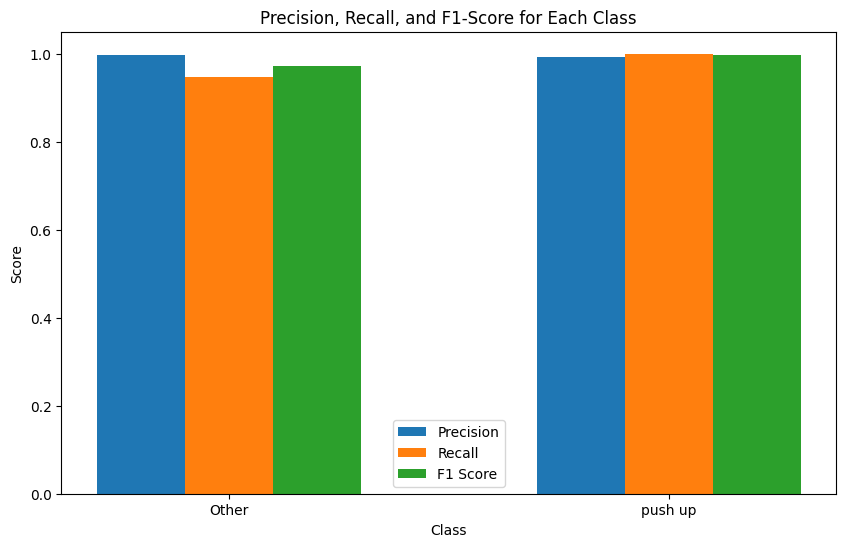

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Dapatkan metrik precision, recall, dan F1
precision, recall, f1, _ = precision_recall_fscore_support(y_test_classes, y_pred_classes)

# Buat grafik batang
labels = ['Other', 'push up']
x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([p + 0.2 for p in x], recall, width=0.2, label='Recall', align='center')
plt.bar([p + 0.4 for p in x], f1, width=0.2, label='F1 Score', align='center')

plt.xticks([p + 0.2 for p in x], labels)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.legend()
plt.show()

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[ 471   26]
 [   1 3923]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       497
           1       0.99      1.00      1.00      3924

    accuracy                           0.99      4421
   macro avg       1.00      0.97      0.98      4421
weighted avg       0.99      0.99      0.99      4421

ROC AUC Score: 0.9987001519822297


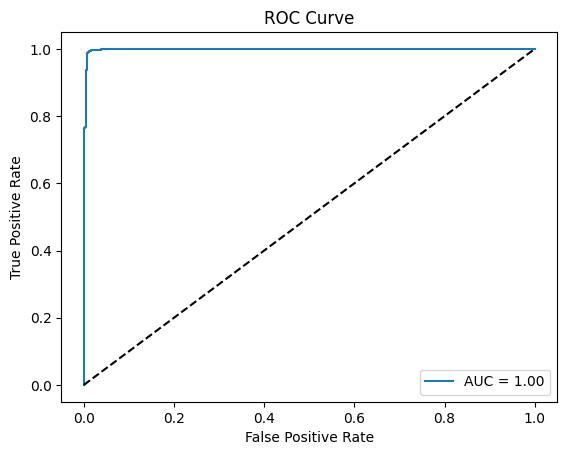

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Pastikan y_test dalam bentuk 1D (jika belum dalam bentuk label, konversi menggunakan argmax)
y_test_classes = y_test if y_test.ndim == 1 else np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

# ROC AUC Score (binary case)
if len(np.unique(y_test_classes)) == 2:  # Pastikan ini kasus biner
    roc_auc = roc_auc_score(y_test_classes, y_pred[:, 1])  # Menggunakan probabilitas kelas positif
    print("ROC AUC Score:", roc_auc)

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred[:, 1])  # Menggunakan probabilitas kelas positif
    plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
else:
    print()

Export Model

In [ ]:
import tensorflow as tf
from google.colab import files


In [ ]:
# 1. Save the model in H5 format
h5_model_file = "model.h5"
model.save(h5_model_file)  # Save the model as H5
print(f"Model saved as {h5_model_file}")

In [ ]:
# 2. Convert the model to TensorFlow Lite
# Load the model back from H5
model_loaded = tf.keras.models.load_model(h5_model_file)

In [ ]:
# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_loaded)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Apply optimization (optional)
tflite_model = converter.convert()

In [ ]:
# 3. Save the converted model
tflite_model_file = "model.tflite"
with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)
print(f"Model converted and saved as {tflite_model_file}")

In [ ]:
# 4. Download both H5 and TFLite models
files.download(h5_model_file)  # Download H5 model
files.download(tflite_model_file)  # Download TFLite model